# Admin No:   18/06295 
 # Name:       Joseph Karanja Muroba
 # Unit Name:  MISM5405 Data Analytics and Knowledge Engineering
   # Assignment Four October 2022 
               ### Model Deployment

# Tasks
1. Process and Explore the Data to understand how to deploy models

# Dataset
DIAMOND Pricing

Simple dataset to predict diamonds prices based on their shape and color.

   (i)  Carat=Unit of weight for stones and pearls.Weight of the diamond.
   
   (ii) Cut=Quality of the cut (Fair, Good, Very Good, Premium, Ideal)
   
   (iii) Color=Diamond colour, from J (worst) to D (best)
   
   (iv) Clarity=A measurement of how clear the diamond is"Diamond Clarity Scale".E.G Worst,good,best
   
   (v)  Depth=Total depth percentage.Percentage format of z / x. it's a common parameter in the industry
   
   (vi) Table=Width of top of diamond relative to widest point.
   
   (vii) Price=price in US dollars .USD price
   
   (viii) x,y and z =(X)Length in mm (0–10.74).(Y)Width in mm (0–58.9).(Z)Depth in mm (0–31.8)
   
   # URL
https://www.kaggle.com/datasets/vittoriogiatti/diamondprices

In [1]:
#Step1: Introduction:Process and Explore the data to understand how to create model for Diamond Pricing 
     # i.Import Modules(Libraries) to use in this excercise
    
import pandas as pd
from xgboost import XGBRegressor # A supervised ML library that is used for classification as well as regeneration
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
# Upload the data
dataset = pd.read_csv('C:/pydata/DiamondsPrices01.csv',index_col=0)
dataset.head(20)

,carat,depth,table,price,x,y,z,cut,color,clarity
Date,,,,,,,,,,
03-01-06,0.21,59.8,61.0,326,3.89,3.84,2.31,Premium,E,SI1
04-01-06,0.23,56.9,65.0,327,4.05,4.07,2.31,Good,E,VS1
05-01-06,0.29,62.4,58.0,334,4.20,4.23,2.63,Premium,I,VS2
06-01-06,0.31,63.3,58.0,335,4.34,4.35,2.75,Good,J,SI2
09-01-06,0.24,62.8,57.0,336,3.94,3.96,2.48,Very Good,J,VVS2
10-01-06,0.24,62.3,57.0,336,3.95,3.98,2.47,Very Good,I,VVS1
11-01-06,0.26,61.9,55.0,337,4.07,4.11,2.53,Very Good,H,SI1
12-01-06,0.22,65.1,61.0,337,3.87,3.78,2.49,Fair,E,VS2
13-01-06,0.23,59.4,61.0,338,4.00,4.05,2.39,Very Good,H,VS1


In [3]:
dataset.shape
dataset.isna().sum()
dataset.dtypes

carat      float64
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
cut         object
color       object
clarity     object
dtype: object

All variables except cut, color, and clarity are numerical. Let’s check further into those three variables.

In [4]:
#Data Preparation
#By inspecting the values for each of these variables, we can see that they are categorical
dataset.cut.value_counts()
dataset.color.value_counts()
dataset.clarity.value_counts()

SI1     743
VS2     707
SI2     528
VS1     523
VVS2    207
VVS1    169
I1       93
IF       49
Name: clarity, dtype: int64

Each diamond has a Cut, Color, and Clarity rating on a scale. For Cut, the scale(from highest to lowest) is Ideal>Premium>Very Good>Good>Fair.
These are called ordinal categorical variable.We have to encode them according to the inherent scale if we want to appropriately capture the information in numeric form.

In [5]:
# Encode the ordinal categorical variable 'cut'
cut_mapping = {'Fair': 0, 'Good': 1, 'Very Good': 2, 'Premium': 3, 'Ideal': 4}
dataset.cut = dataset.cut.map(cut_mapping)

# Encoding the ordinal categorical variable 'color'
color_mapping = {'J': 0, 'I': 1, 'H': 2, 'G': 3, 'F': 4, 'E': 5, 'D': 6}
dataset.color = dataset.color.map(color_mapping)

# Encoding the ordinal cateogircal variable 'clarity'
clarity_mapping = {'I1': 0, 'SI2': 1, 'SI1': 2, 'VS2': 3, 'VS1': 4, 'VVS2': 5, 'VVS1': 6, 'IF': 7}
dataset.clarity = dataset.clarity.map(clarity_mapping)

Once we have encoded the ordinal variables, We get rid of any outliers data.
Any observations with an X,Y, or Z dimension of 0 are droped

In [6]:
dataset = dataset.drop(dataset[dataset["x"]==0].index)
dataset = dataset.drop(dataset[dataset["y"]==0].index)
dataset = dataset.drop(dataset[dataset["z"]==0].index)

We will cut the dataset down to the 99th percentile based on a few different variables to get rid of the most egregious outliers.

In [7]:
dataset = dataset[dataset['depth'] < dataset['depth'].quantile(0.99)]
dataset = dataset[dataset['table'] < dataset['table'].quantile(0.99)]
dataset = dataset[dataset['x'] < dataset['x'].quantile(0.99)]
dataset = dataset[dataset['y'] < dataset['y'].quantile(0.99)]
dataset = dataset[dataset['z'] < dataset['z'].quantile(0.99)]

Now that the data is all prepared for modeling, 
let us take a look at a correlation heatmap to see what features we can expect to influence price and how?

<AxesSubplot:>

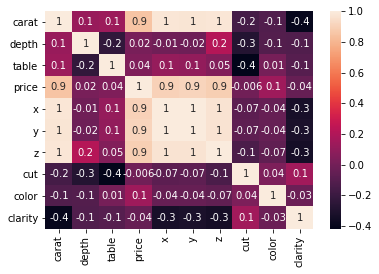

In [8]:
sns.heatmap(dataset.corr(), annot=True,fmt='.1g')

In [9]:
# Create the Model
#Do the standard train/validation/test split
model_df = dataset.copy()
X = model_df.drop(['price'], axis=1)
y = model_df['price']
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=0)

I am going to do a GridSearchCV at an XGBoost Regressor to come up with an optimal fit in a more easy way.

In [ ]:
xgb1 = XGBRegressor()
parameters = {
              'objective':['reg:squarederror'],
              'learning_rate': [.0001, 0.001, .01],
              'max_depth': [3, 5, 7],
              'min_child_weight': [3,5,7],
              'subsample': [0.1,0.5,1.0],
              'colsample_bytree': [0.1, 0.5, 1.0],
              'n_estimators': [500]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 3,
                        n_jobs = -1,
                        verbose=0)

xgb_grid.fit(X_train, y_train)

xgb_cv = (xgb_grid.best_estimator_)

eval_set = [(X_train, y_train),
            (X_val, y_val)]

fit_model = xgb_cv.fit(
    X_train,
    y_train,
    eval_set=eval_set,
    eval_metric='mae',
    early_stopping_rounds=50,
    verbose=False)

print("MAE:", mean_absolute_error(y_val, fit_model.predict(X_val)))
print("MSE:", mean_squared_error(y_val, fit_model.predict(X_val)))
print("R2:", r2_score(y_val, fit_model.predict(X_val)))

The model perfomance is ok for both validation scores and Test scores

In [ ]:
# Fit the Model
fit_model.save_model('xgb_model.json')

# Building the Model Application
#Using Streamlit
#Requirements for building the App
xgboost
sklearn
pandas

In [ ]:
import xgboost as xgb
import streamlit as st
import pandas as pd
#Loading up the Regression model we created
model = xgb.XGBRegressor()
model.load_model('xgb_model.json')

#Caching the model for faster loading
@st.cache

I have loaded up our model from the JSON file to Streamlit
Define a function that takes in our users input (diamond characteristics) and outputs a price prediction:
Encoding ordinal variables again — that is because I will be taking those values in with their original formats.
Also, since the model was originally trained using a pandas DataFrame, it insists on getting new data in a similar format. That’s why we have to feed the variables to the model’s predict method using pd.DataFrame.

In [ ]:
def predict(carat, cut, color, clarity, depth, table, x, y, z):
    #Predicting the price of the carat
    if cut == 'Fair':
        cut = 0
    elif cut == 'Good':
        cut = 1
    elif cut == 'Very Good':
        cut = 2
    elif cut == 'Premium':
        cut = 3
    elif cut == 'Ideal':
        cut = 4

    if color == 'J':
        color = 0
    elif color == 'I':
        color = 1
    elif color == 'H':
        color = 2
    elif color == 'G':
        color = 3
    elif color == 'F':
        color = 4
    elif color == 'E':
        color = 5
    elif color == 'D':
        color = 6
    
    if clarity == 'I1':
        clarity = 0
    elif clarity == 'SI2':
        clarity = 1
    elif clarity == 'SI1':
        clarity = 2
    elif clarity == 'VS2':
        clarity = 3
    elif clarity == 'VS1':
        clarity = 4
    elif clarity == 'VVS2':
        clarity = 5
    elif clarity == 'VVS1':
        clarity = 6
    elif clarity == 'IF':
        clarity = 7
    

    prediction = model.predict(pd.DataFrame([[carat, cut, color, clarity, depth, table, x, y, z]], columns=['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']))
    return prediction

The prediction function defined need to create the app itself, and areas for user inputs.
Start with the app

In [ ]:
#Basic title and image for the landing page, and a header with instructions.
st.title('Diamond Price Predictor')
st.image("""https://www.thestreet.com/.image/ar_4:3%2Cc_fill%2Ccs_srgb%2Cq_auto:good%2Cw_1200/MTY4NjUwNDYyNTYzNDExNTkx/why-dominion-diamonds-second-trip-to-the-block-may-be-different.png"""))
st.header('Enter the characteristics of the diamond:')

In [ ]:
#Define the user inputs
carat = st.number_input('Carat Weight:', min_value=0.1, max_value=10.0, value=1.0)

cut = st.selectbox('Cut Rating:', ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'])

color = st.selectbox('Color Rating:', ['J', 'I', 'H', 'G', 'F', 'E', 'D'])

clarity = st.selectbox('Clarity Rating:', ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF'])

depth = st.number_input('Diamond Depth Percentage:', min_value=0.1, max_value=100.0, value=1.0)

table = st.number_input('Diamond Table Percentage:', min_value=0.1, max_value=100.0, value=1.0)

x = st.number_input('Diamond Length (X) in mm:', min_value=0.1, max_value=100.0, value=1.0)

y = st.number_input('Diamond Width (Y) in mm:', min_value=0.1, max_value=100.0, value=1.0)

z = st.number_input('Diamond Height (Z) in mm:', min_value=0.1, max_value=100.0, value=1.0)

This creates a number of numerical input and dropdown menu fields that align with our model inputs

In [ ]:
# input that calls our prediction function
if st.button('Predict Price'):
    price = predict(carat, cut, color, clarity, depth, table, x, y, z)
    st.success(f'The predicted price of the diamond is ${price[0]:.2f} USD')

This creates a Predict Price button that, when clicked, will output the model’s prediction for the given variables.